In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cityData = "data/city_data.csv"
rideData = "data/ride_data.csv"

# Read the City and Ride Data

CityData_df = pd.read_csv("data/city_data.csv")
RideData_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset

combined_df = pd.merge(RideData_df, CityData_df , how= "outer", on="city")

# Display the data table for preview
combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

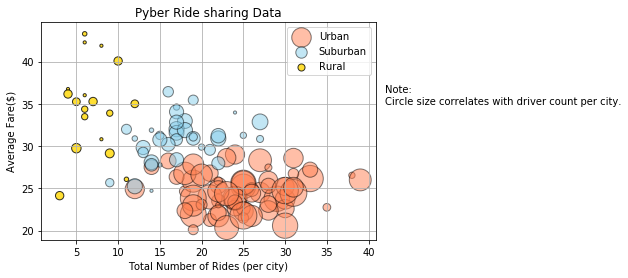

In [2]:
# Obtain the x and y coordinates for each of the three city types
UrbanCities = combined_df[combined_df["type"] == "Urban"]
SuburbanCities = combined_df[combined_df["type"] == "Suburban"]
RuralCities = combined_df[combined_df["type"] == "Rural"]


UrbanRideCount = UrbanCities.groupby(["city"]).count()["ride_id"]
UrbanAvgFare = UrbanCities.groupby(["city"]).mean()["fare"]
UrbanDriverCount = UrbanCities.groupby(["city"]).mean()["driver_count"]


SuburbanRideCount = SuburbanCities.groupby(["city"]).count()["ride_id"]
SuburbanAvgFare = SuburbanCities.groupby(["city"]).mean()["fare"]
SuburbanDriverCount = SuburbanCities.groupby(["city"]).mean()["driver_count"]

RuralRideCount = RuralCities.groupby(["city"]).count()["ride_id"]
RuralAvgFare = RuralCities.groupby(["city"]).mean()["fare"]
RuralDriverCount = RuralCities.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(UrbanRideCount, UrbanAvgFare, s=10*UrbanDriverCount, c="coral", 
            edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Urban")

plt.scatter(SuburbanRideCount, SuburbanAvgFare, s=10*SuburbanDriverCount, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Suburban")

plt.scatter(RuralRideCount, RuralAvgFare, s=10*RuralDriverCount, c="gold", 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride sharing Data")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare($)")

# Create a legend
plt.legend()
plt.grid()

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("PyberBubbleChart.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

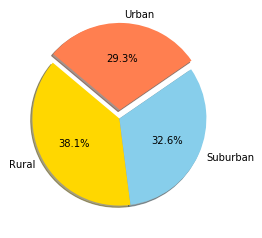

In [13]:
# Calculate Type Percents
TotalFare = combined_df.groupby(["type"])["fare"].max()



# Build Pie Chart
CityTypes = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = (0,0, 0.1)

plt.pie(TotalFare, explode=explode, labels=CityTypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("TotalFaresbyCityTypePieChart.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

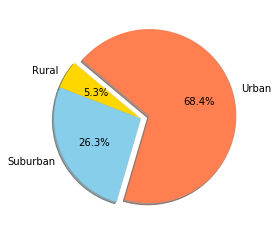

In [6]:
# Calculate Ride Percents
TotalRides = combined_df.groupby(["type"])["ride_id"].count()

# Build Pie Chart
plt.pie(TotalRides, explode=explode, labels=CityTypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("TotalRidesbyCityTypePieChart.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

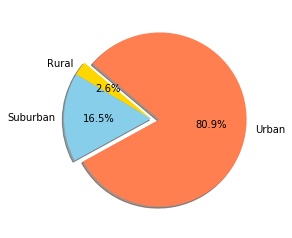

In [17]:
# Calculate Driver Percents

TotalDriver = CityData_df.groupby(["type"])["driver_count"].sum()


# Build Pie Chart
plt.pie(TotalDriver, explode=explode, labels=CityTypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("TotalDriversbyCityTypePieChart.png")

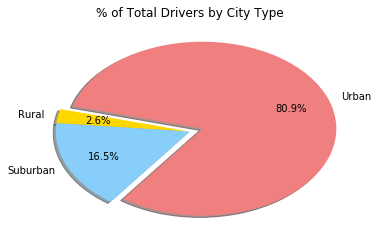

In [6]:
# Show Figure
plt.show()

In [ ]:
#Observation 1: Most rides occur in Urban cities
#Observation 2: As a result, most drivers are in urban cities as well
#Observation 3: Fares are slightly higher in rural areas than in Urban and Sububuran areas